In [1]:
import os
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.applications import DenseNet121
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models
from keras.layers.wrappers import TimeDistributed
from keras.layers.core import Dense, Dropout, Flatten, Activation
from keras.layers.convolutional import Conv1D, MaxPooling1D,MaxPooling2D
from keras.layers.recurrent import LSTM,GRU
from keras.layers import Bidirectional
from keras.layers.pooling import GlobalAveragePooling1D
from keras.layers import Dropout
import matplotlib.pyplot as plt
stlf_data=pd.read_csv('C:\\Users\\Khalid\\Desktop\\stlf_github\\stlf_sim\\Data/02_Feb.csv')

In [2]:
stlf_data

,Temp,Hum,A,B,C,D,E,F,G,H,I,J,Cons
0,13.000000,83.000000,1,4,1,1629.0,1813.0,1838.0,1507.0,1391.0,1561.0,1693.500000,1505.0
1,12.833333,83.416667,1,4,1,1579.0,1755.0,1834.0,1451.0,1364.0,1517.0,1663.083333,1469.0
2,12.666667,83.833333,1,4,1,1557.0,1712.0,1861.0,1467.0,1318.0,1505.0,1629.833333,1462.0
3,12.500000,84.250000,1,4,1,1539.0,1662.0,1876.0,1449.0,1325.0,1489.0,1590.833333,1408.0
4,12.333333,84.666667,2,4,1,1505.0,1629.0,1813.0,1438.0,1313.0,1455.0,1557.833333,1417.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8059,13.372452,78.029950,23,5,1,1837.0,1898.0,1992.0,1722.0,1738.0,1589.0,1850.583333,1687.0
8060,13.372452,78.029950,24,5,1,1808.0,1878.0,1975.0,1684.0,1708.0,1538.0,1825.416667,1673.0
8061,13.372452,78.029950,24,5,1,1770.0,1875.0,1930.0,1581.0,1665.0,1409.0,1803.416667,1666.0
8062,13.100000,78.029950,24,5,1,1765.0,1863.0,1921.0,1535.0,1612.0,1346.0,1778.416667,1621.0


In [3]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8064 entries, 0 to 8063
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8064 non-null   float64
 1   Hum     8064 non-null   float64
 2   A       8064 non-null   int64  
 3   B       8064 non-null   int64  
 4   C       8064 non-null   int64  
 5   D       8064 non-null   float64
 6   E       8064 non-null   float64
 7   F       8064 non-null   float64
 8   G       8064 non-null   float64
 9   H       8064 non-null   float64
 10  I       8064 non-null   float64
 11  J       8064 non-null   float64
 12  Cons    8064 non-null   float64
dtypes: float64(10), int64(3)
memory usage: 819.1 KB


In [4]:
import numpy as np
stlf_data['A']=stlf_data['A'].astype(np.float64)
stlf_data['B']=stlf_data['B'].astype(np.float64)
stlf_data['C']=stlf_data['C'].astype(np.float64)

In [5]:
stlf_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8064 entries, 0 to 8063
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Temp    8064 non-null   float64
 1   Hum     8064 non-null   float64
 2   A       8064 non-null   float64
 3   B       8064 non-null   float64
 4   C       8064 non-null   float64
 5   D       8064 non-null   float64
 6   E       8064 non-null   float64
 7   F       8064 non-null   float64
 8   G       8064 non-null   float64
 9   H       8064 non-null   float64
 10  I       8064 non-null   float64
 11  J       8064 non-null   float64
 12  Cons    8064 non-null   float64
dtypes: float64(13)
memory usage: 819.1 KB


In [6]:
train = stlf_data.copy()[stlf_data.index <= 6816][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]

In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
train[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(train)
train.head()
#train.info()

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-1.106131,-0.937848,1.071355,-1.660867,-0.014303,0.670218,-0.610396,0.123904,0.224613,-1.082382,-1.523442,-0.823597,-0.373055
1,-1.249625,-0.974197,1.094306,-1.660867,-0.014303,0.670218,-0.809639,-0.107273,0.208663,-1.307053,-1.630921,-0.997397,-0.501139
2,-1.277526,-1.010546,1.117257,-1.660867,-0.014303,0.670218,-0.897306,-0.278664,0.316330,-1.242861,-1.814034,-1.044797,-0.641153
3,-1.492768,-1.046896,1.140209,-1.660867,-0.014303,0.670218,-0.969034,-0.477954,0.376145,-1.315077,-1.786169,-1.107997,-0.805380
4,-1.456894,-1.083245,1.163160,-1.516422,-0.014303,0.670218,-1.104519,-0.609486,0.124922,-1.359208,-1.833937,-1.242297,-0.944341


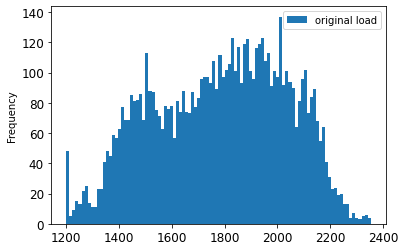

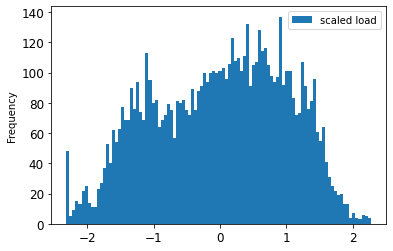

In [8]:
stlf_data[stlf_data.index <= 6816][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
train[train.index <= 6816][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

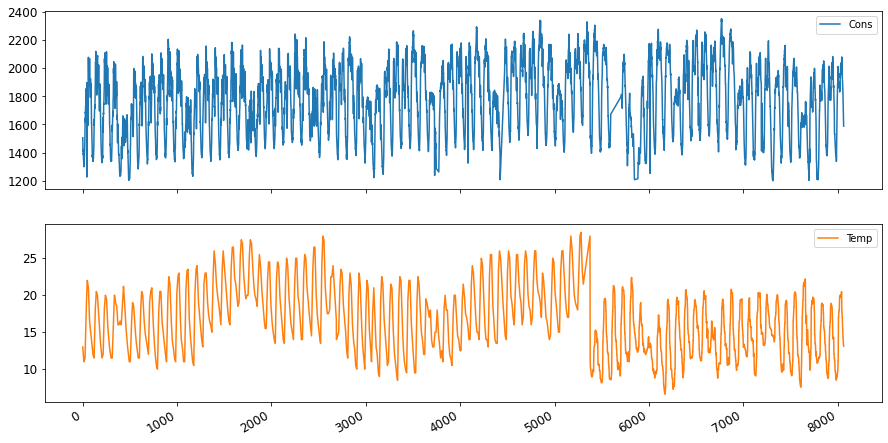

In [9]:
import matplotlib.pyplot as plt
stlf_data.plot(y=['Cons', 'Temp'], subplots=True, figsize=(15, 8), fontsize=12)
plt.show()

In [10]:
train_shifted = train.copy()
train_shifted=train_shifted.astype(np.float64)
train_shifted['y_t+100'] = train_shifted['Cons'].shift(-100)
train_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,-1.106131,-0.937848,1.071355,-1.660867,-0.014303,0.670218,-0.610396,0.123904,0.224613,-1.082382,-1.523442,-0.823597,-0.373055,-1.409063
1,-1.249625,-0.974197,1.094306,-1.660867,-0.014303,0.670218,-0.809639,-0.107273,0.208663,-1.307053,-1.630921,-0.997397,-0.501139,-1.524655
2,-1.277526,-1.010546,1.117257,-1.660867,-0.014303,0.670218,-0.897306,-0.278664,0.316330,-1.242861,-1.814034,-1.044797,-0.641153,-1.652205
3,-1.492768,-1.046896,1.140209,-1.660867,-0.014303,0.670218,-0.969034,-0.477954,0.376145,-1.315077,-1.786169,-1.107997,-0.805380,-1.588430
4,-1.456894,-1.083245,1.163160,-1.516422,-0.014303,0.670218,-1.104519,-0.609486,0.124922,-1.359208,-1.833937,-1.242297,-0.944341,-1.624304
5,-1.572486,-1.119594,1.186112,-1.516422,-0.014303,0.670218,-1.247974,-0.808777,-0.106363,-1.555795,-1.957339,-1.376597,-1.073126,-1.672135
6,-1.552557,-1.155943,1.209063,-1.516422,-0.014303,0.670218,-1.275868,-0.896465,-0.277832,-1.628011,-2.032973,-1.412147,-1.185067,-1.640248
7,-1.632276,-1.192293,1.232014,-1.516422,-0.014303,0.670218,-1.491050,-0.968209,-0.477216,-1.708250,-2.092683,-1.447697,-1.286481,-1.660177
8,-1.743882,-1.228642,1.254966,-1.371978,-0.014303,0.670218,-1.455187,-1.103727,-0.608808,-1.712262,-2.140452,-1.585946,-1.386140,-1.723952
9,-1.751854,-1.264991,1.277917,-1.371978,-0.014303,0.670218,-1.570747,-1.247217,-0.808192,-1.704238,-2.128510,-1.585946,-1.468955,-1.775770


In [11]:
train_shifted = train_shifted.rename(columns={'Cons':'Cons_original'})
train_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
0,-1.106131,-0.937848,1.071355,-1.660867,-0.014303,0.670218,-0.610396,0.123904,0.224613,-1.082382,-1.523442,-0.823597,-0.373055,-1.409063
1,-1.249625,-0.974197,1.094306,-1.660867,-0.014303,0.670218,-0.809639,-0.107273,0.208663,-1.307053,-1.630921,-0.997397,-0.501139,-1.524655
2,-1.277526,-1.010546,1.117257,-1.660867,-0.014303,0.670218,-0.897306,-0.278664,0.316330,-1.242861,-1.814034,-1.044797,-0.641153,-1.652205
3,-1.492768,-1.046896,1.140209,-1.660867,-0.014303,0.670218,-0.969034,-0.477954,0.376145,-1.315077,-1.786169,-1.107997,-0.805380,-1.588430
4,-1.456894,-1.083245,1.163160,-1.516422,-0.014303,0.670218,-1.104519,-0.609486,0.124922,-1.359208,-1.833937,-1.242297,-0.944341,-1.624304
5,-1.572486,-1.119594,1.186112,-1.516422,-0.014303,0.670218,-1.247974,-0.808777,-0.106363,-1.555795,-1.957339,-1.376597,-1.073126,-1.672135
6,-1.552557,-1.155943,1.209063,-1.516422,-0.014303,0.670218,-1.275868,-0.896465,-0.277832,-1.628011,-2.032973,-1.412147,-1.185067,-1.640248
7,-1.632276,-1.192293,1.232014,-1.516422,-0.014303,0.670218,-1.491050,-0.968209,-0.477216,-1.708250,-2.092683,-1.447697,-1.286481,-1.660177
8,-1.743882,-1.228642,1.254966,-1.371978,-0.014303,0.670218,-1.455187,-1.103727,-0.608808,-1.712262,-2.140452,-1.585946,-1.386140,-1.723952
9,-1.751854,-1.264991,1.277917,-1.371978,-0.014303,0.670218,-1.570747,-1.247217,-0.808192,-1.704238,-2.128510,-1.585946,-1.468955,-1.775770


In [12]:
# For debugging why val_loss gives NaN
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
6807,0.874884,-0.900237,1.699535,1.372465,0.985708,0.670218,0.979563,1.554811,1.735938,0.682888,0.797309,0.144152,1.300798,NaN
6808,0.831039,-0.900237,1.699535,1.516910,0.985708,0.670218,0.923775,1.363492,1.716000,0.506361,0.729637,0.144152,1.223246,NaN
6809,0.591882,-0.900237,1.699535,1.516910,0.985708,0.670218,0.927759,1.235946,1.580419,0.365942,0.538563,0.495701,1.136570,NaN
6810,0.416500,-0.878427,1.664154,1.516910,0.985708,0.670218,0.951669,1.100428,1.572444,0.430133,0.510698,0.633951,1.035157,NaN
6811,0.416500,-0.856618,1.628773,1.516910,0.985708,0.670218,0.875956,0.980854,1.556493,0.289714,0.347489,0.033552,0.935147,NaN
6812,0.416500,-0.856618,1.628773,1.661354,0.985708,0.670218,0.832123,0.925053,1.365085,0.133247,0.104666,-0.701147,0.851980,NaN
6813,0.229161,-0.856618,1.628773,1.661354,0.985708,0.670218,0.593031,0.929038,1.237480,-0.007172,0.029033,-0.452298,0.763550,NaN
6814,0.097625,-0.839170,1.628773,1.661354,0.985708,0.670218,0.417697,0.952953,1.101899,-0.215795,-0.058543,-0.065198,0.675471,NaN
6815,-0.037897,-0.839170,1.551998,1.661354,0.985708,0.670218,0.417697,0.877223,0.982270,-0.392322,-0.185925,-0.385148,0.585989,NaN
6816,-0.245167,-0.839170,1.551998,-1.660867,1.485713,-1.492052,0.417697,0.833379,0.926442,-0.432442,-0.325250,-0.428598,0.483171,NaN


In [13]:
#One Nan value on 5699, filled with linear interpolation
train_shifted = train_shifted.dropna(how='any')

In [14]:
train_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
6707,0.926701,-1.168494,1.692948,1.228021,0.485703,0.670218,1.401958,1.630542,1.177665,0.939655,1.143630,1.040801,1.446777,0.874884
6708,0.779221,-1.168494,1.692948,1.372465,0.485703,0.670218,1.302336,1.598655,1.257418,0.867439,1.060036,1.123751,1.405019,0.831039
6709,0.795165,-1.168494,1.692948,1.372465,0.485703,0.670218,1.182790,1.510967,1.520604,0.967738,1.067997,1.127701,1.341503,0.591882
6710,0.803137,-1.146685,1.722627,1.372465,0.485703,0.670218,0.991517,1.475095,1.640234,0.883487,0.781386,1.100051,1.268163,0.416500
6711,0.655657,-1.124875,1.752306,1.372465,0.485703,0.670218,0.927759,1.403350,1.632259,0.791211,0.128550,0.981551,1.182540,0.416500
6712,0.480275,-1.124875,1.752306,1.516910,0.485703,0.670218,0.780320,1.303705,1.600357,0.723008,0.128550,0.831451,1.084284,0.416500
6713,0.340767,-1.124875,1.752306,1.516910,0.485703,0.670218,0.796259,1.184130,1.512629,0.530433,0.482833,0.653701,0.981467,0.229161
6714,0.404542,-1.325523,1.807203,1.516910,0.485703,0.670218,0.804229,0.992811,1.476740,0.502349,0.622158,0.519401,0.887423,0.097625
6715,0.265034,-1.526171,1.862099,1.516910,0.485703,0.670218,0.656789,0.929038,1.404962,0.337858,0.017091,0.337701,0.787412,-0.037897
6716,0.109583,-1.526171,1.862099,1.661354,0.485703,0.670218,0.481455,0.781563,1.305270,0.093127,-0.723321,0.219202,0.682490,-0.245167


In [15]:
y_train = train_shifted[['y_t+100']]
y_train


,y_t+100
0,-1.409063
1,-1.524655
2,-1.652205
3,-1.588430
4,-1.624304
...,...
6712,0.416500
6713,0.229161
6714,0.097625
6715,-0.037897


In [16]:
X_train = train_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_train


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
0,-1.106131,-0.937848,1.071355,-1.660867,-0.014303,0.670218,-0.610396,0.123904,0.224613,-1.082382,-1.523442,-0.823597,-0.373055
1,-1.249625,-0.974197,1.094306,-1.660867,-0.014303,0.670218,-0.809639,-0.107273,0.208663,-1.307053,-1.630921,-0.997397,-0.501139
2,-1.277526,-1.010546,1.117257,-1.660867,-0.014303,0.670218,-0.897306,-0.278664,0.316330,-1.242861,-1.814034,-1.044797,-0.641153
3,-1.492768,-1.046896,1.140209,-1.660867,-0.014303,0.670218,-0.969034,-0.477954,0.376145,-1.315077,-1.786169,-1.107997,-0.805380
4,-1.456894,-1.083245,1.163160,-1.516422,-0.014303,0.670218,-1.104519,-0.609486,0.124922,-1.359208,-1.833937,-1.242297,-0.944341
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6712,0.480275,-1.124875,1.752306,1.516910,0.485703,0.670218,0.780320,1.303705,1.600357,0.723008,0.128550,0.831451,1.084284
6713,0.340767,-1.124875,1.752306,1.516910,0.485703,0.670218,0.796259,1.184130,1.512629,0.530433,0.482833,0.653701,0.981467
6714,0.404542,-1.325523,1.807203,1.516910,0.485703,0.670218,0.804229,0.992811,1.476740,0.502349,0.622158,0.519401,0.887423
6715,0.265034,-1.526171,1.862099,1.516910,0.485703,0.670218,0.656789,0.929038,1.404962,0.337858,0.017091,0.337701,0.787412


In [17]:
valid = stlf_data.copy()[(stlf_data.index >=6817) & (stlf_data.index <=7777)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
valid


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
6817,1691.0,13.452452,91.725740,1.0,7.0,0.0,1840.0,1931.0,2015.0,1605.0,1657.0,1654.0,1869.833333
6818,1614.0,13.072452,92.619702,1.0,7.0,0.0,1807.0,1887.0,2021.0,1634.0,1648.0,1627.0,1835.916667
6819,1622.0,12.692452,93.513664,1.0,7.0,0.0,1773.0,1887.0,2002.0,1619.0,1625.0,1601.0,1804.250000
6820,1605.0,12.692452,93.513664,2.0,7.0,0.0,1721.0,1887.0,1991.0,1605.0,1606.0,1581.0,1772.083333
6821,1600.0,12.692452,93.513664,2.0,7.0,0.0,1691.0,1840.0,1931.0,1562.0,1591.0,1558.0,1744.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7773,1409.0,12.322452,84.199320,24.0,2.0,1.0,1671.0,1779.0,1813.0,1509.0,1659.0,1597.0,1677.083333
7774,1346.0,11.462452,84.199320,24.0,2.0,1.0,1645.0,1769.0,1805.0,1471.0,1621.0,1555.0,1638.833333
7775,1337.0,11.462452,88.158585,24.0,2.0,1.0,1589.0,1689.0,1778.0,1457.0,1599.0,1539.0,1602.083333
7776,1331.0,11.462452,88.158585,1.0,3.0,1.0,1538.0,1682.0,1771.0,1411.0,1529.0,1525.0,1565.416667


In [18]:
valid[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(valid)
valid.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
6817,-0.206997,-0.400218,0.905233,-1.658081,1.441195,-1.003127,0.383925,0.744973,1.075970,-0.640864,-0.566621,-0.632388,0.526059
6818,-0.515196,-0.506184,0.958572,-1.658081,1.441195,-1.003127,0.251071,0.567690,1.100092,-0.530108,-0.600850,-0.734412,0.383022
6819,-0.483175,-0.612151,1.011912,-1.658081,1.441195,-1.003127,0.114191,0.567690,1.023705,-0.587396,-0.688322,-0.832657,0.249474
6820,-0.551219,-0.612151,1.011912,-1.513750,1.441195,-1.003127,-0.095155,0.567690,0.979481,-0.640864,-0.760582,-0.908230,0.113818
6821,-0.571232,-0.612151,1.011912,-1.513750,1.441195,-1.003127,-0.215931,0.378321,0.738258,-0.805088,-0.817629,-0.995139,-0.002510
6822,-0.779367,-0.592631,0.997433,-1.513750,1.441195,-1.003127,-0.525924,0.245359,0.561361,-0.839460,-0.775794,-0.991361,-0.121649
6823,-0.667294,-0.573111,0.982954,-1.513750,1.441195,-1.003127,-0.493717,0.108368,0.561361,-0.835641,-0.878479,-0.968689,-0.230947
6824,-0.707320,-0.573111,0.982954,-1.369419,1.441195,-1.003127,-0.562157,-0.101148,0.561361,-0.892929,-0.893692,-1.066934,-0.343760
6825,-0.791374,-0.573111,0.982954,-1.369419,1.441195,-1.003127,-0.582287,-0.222022,0.372402,-0.965493,-0.931723,-1.134950,-0.447436
6826,-0.803382,-0.857548,1.108550,-1.369419,1.441195,-1.003127,-0.791633,-0.532267,0.239730,-1.007503,-1.011590,-1.184072,-0.540568


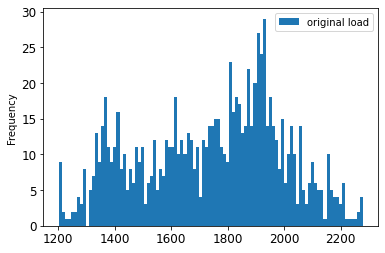

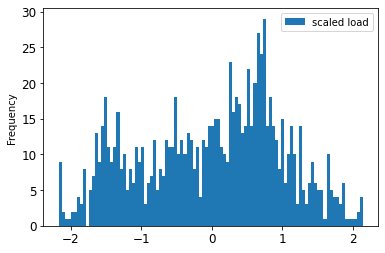

In [19]:
stlf_data[(stlf_data.index >=6817) & (stlf_data.index <=7777)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
valid[(valid.index >=6817) & (valid.index <=7777)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [20]:
valid_shifted = valid.copy()
valid_shifted=valid_shifted.astype(np.float64)
valid_shifted['y_t+100'] = valid_shifted['Cons'].shift(-100)
valid_shifted.head(10)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
6817,-0.206997,-0.400218,0.905233,-1.658081,1.441195,-1.003127,0.383925,0.744973,1.075970,-0.640864,-0.566621,-0.632388,0.526059,-0.587243
6818,-0.515196,-0.506184,0.958572,-1.658081,1.441195,-1.003127,0.251071,0.567690,1.100092,-0.530108,-0.600850,-0.734412,0.383022,-0.591245
6819,-0.483175,-0.612151,1.011912,-1.658081,1.441195,-1.003127,0.114191,0.567690,1.023705,-0.587396,-0.688322,-0.832657,0.249474,-0.647281
6820,-0.551219,-0.612151,1.011912,-1.513750,1.441195,-1.003127,-0.095155,0.567690,0.979481,-0.640864,-0.760582,-0.908230,0.113818,-0.839405
6821,-0.571232,-0.612151,1.011912,-1.513750,1.441195,-1.003127,-0.215931,0.378321,0.738258,-0.805088,-0.817629,-0.995139,-0.002510,-1.291697
6822,-0.779367,-0.592631,0.997433,-1.513750,1.441195,-1.003127,-0.525924,0.245359,0.561361,-0.839460,-0.775794,-0.991361,-0.121649,-1.047540
6823,-0.667294,-0.573111,0.982954,-1.513750,1.441195,-1.003127,-0.493717,0.108368,0.561361,-0.835641,-0.878479,-0.968689,-0.230947,-1.079560
6824,-0.707320,-0.573111,0.982954,-1.369419,1.441195,-1.003127,-0.562157,-0.101148,0.561361,-0.892929,-0.893692,-1.066934,-0.343760,-1.119586
6825,-0.791374,-0.573111,0.982954,-1.369419,1.441195,-1.003127,-0.582287,-0.222022,0.372402,-0.965493,-0.931723,-1.134950,-0.447436,-1.083563
6826,-0.803382,-0.857548,1.108550,-1.369419,1.441195,-1.003127,-0.791633,-0.532267,0.239730,-1.007503,-1.011590,-1.184072,-0.540568,-1.031529


In [21]:
valid_shifted = valid_shifted.rename(columns={'Cons':'Cons_original'})
valid_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
6817,-0.206997,-0.400218,0.905233,-1.658081,1.441195,-1.003127,0.383925,0.744973,1.075970,-0.640864,-0.566621,-0.632388,0.526059,-0.587243
6818,-0.515196,-0.506184,0.958572,-1.658081,1.441195,-1.003127,0.251071,0.567690,1.100092,-0.530108,-0.600850,-0.734412,0.383022,-0.591245
6819,-0.483175,-0.612151,1.011912,-1.658081,1.441195,-1.003127,0.114191,0.567690,1.023705,-0.587396,-0.688322,-0.832657,0.249474,-0.647281
6820,-0.551219,-0.612151,1.011912,-1.513750,1.441195,-1.003127,-0.095155,0.567690,0.979481,-0.640864,-0.760582,-0.908230,0.113818,-0.839405
6821,-0.571232,-0.612151,1.011912,-1.513750,1.441195,-1.003127,-0.215931,0.378321,0.738258,-0.805088,-0.817629,-0.995139,-0.002510,-1.291697
6822,-0.779367,-0.592631,0.997433,-1.513750,1.441195,-1.003127,-0.525924,0.245359,0.561361,-0.839460,-0.775794,-0.991361,-0.121649,-1.047540
6823,-0.667294,-0.573111,0.982954,-1.513750,1.441195,-1.003127,-0.493717,0.108368,0.561361,-0.835641,-0.878479,-0.968689,-0.230947,-1.079560
6824,-0.707320,-0.573111,0.982954,-1.369419,1.441195,-1.003127,-0.562157,-0.101148,0.561361,-0.892929,-0.893692,-1.066934,-0.343760,-1.119586
6825,-0.791374,-0.573111,0.982954,-1.369419,1.441195,-1.003127,-0.582287,-0.222022,0.372402,-0.965493,-0.931723,-1.134950,-0.447436,-1.083563
6826,-0.803382,-0.857548,1.108550,-1.369419,1.441195,-1.003127,-0.791633,-0.532267,0.239730,-1.007503,-1.011590,-1.184072,-0.540568,-1.031529


In [22]:
valid_shifted = valid_shifted.dropna(how='any')

In [23]:
valid_shifted.tail(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7668,-0.335080,0.659450,-1.128998,1.372873,-1.256834,-1.003127,-0.066974,0.003610,-0.262819,0.214628,-0.840448,0.025098,-0.107240,-0.243020
7669,-0.327075,0.659450,-1.128998,1.372873,-1.256834,-1.003127,-0.143466,-0.052798,-0.122105,0.222266,-0.775794,-0.031582,-0.126920,-0.287049
7670,-0.315067,0.163079,-0.522097,1.372873,-1.256834,-1.003127,-0.268268,0.031814,0.006547,0.210809,-0.190110,-0.114712,-0.156793,-0.391116
7671,-0.343085,-0.333291,0.084804,1.372873,-1.256834,-1.003127,-0.372941,0.003610,0.062833,0.111511,-0.220535,-0.250744,-0.194046,-0.615261
7672,-0.439147,-0.333291,0.084804,1.517204,-1.256834,-1.003127,-0.344760,-0.072944,-0.001494,0.000755,-0.243354,-0.356546,-0.234110,-0.819392
7673,-0.511194,-0.333291,0.084804,1.517204,-1.256834,-1.003127,-0.336708,-0.149498,-0.057779,-0.064171,-0.429708,-0.511471,-0.275580,-1.335726
7674,-0.531206,-0.396035,0.194411,1.517204,-1.256834,-1.003127,-0.324630,-0.274401,0.026649,-0.102362,-0.425905,-0.549258,-0.326188,-1.587888
7675,-0.675299,-0.458778,0.304019,1.517204,-1.256834,-1.003127,-0.352811,-0.379159,-0.001494,-0.174926,-0.528590,-0.598380,-0.386988,-1.623911
7676,-0.811387,-0.458778,0.304019,1.661535,-1.256834,-1.003127,-0.449433,-0.350955,-0.077881,-0.304778,-0.631275,-0.738191,-0.453059,-1.647927
7677,-0.935467,-0.458778,0.304019,1.661535,-1.256834,-1.003127,-0.521898,-0.342897,-0.154268,-0.434629,-0.794810,-0.949796,-0.523347,-1.844054


In [24]:
y_valid = valid_shifted[['y_t+100']]
y_valid


,y_t+100
6817,-0.587243
6818,-0.591245
6819,-0.647281
6820,-0.839405
6821,-1.291697
...,...
7673,-1.335726
7674,-1.587888
7675,-1.623911
7676,-1.647927


In [25]:
X_valid = valid_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_valid


,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
6817,-0.206997,-0.400218,0.905233,-1.658081,1.441195,-1.003127,0.383925,0.744973,1.075970,-0.640864,-0.566621,-0.632388,0.526059
6818,-0.515196,-0.506184,0.958572,-1.658081,1.441195,-1.003127,0.251071,0.567690,1.100092,-0.530108,-0.600850,-0.734412,0.383022
6819,-0.483175,-0.612151,1.011912,-1.658081,1.441195,-1.003127,0.114191,0.567690,1.023705,-0.587396,-0.688322,-0.832657,0.249474
6820,-0.551219,-0.612151,1.011912,-1.513750,1.441195,-1.003127,-0.095155,0.567690,0.979481,-0.640864,-0.760582,-0.908230,0.113818
6821,-0.571232,-0.612151,1.011912,-1.513750,1.441195,-1.003127,-0.215931,0.378321,0.738258,-0.805088,-0.817629,-0.995139,-0.002510
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7673,-0.511194,-0.333291,0.084804,1.517204,-1.256834,-1.003127,-0.336708,-0.149498,-0.057779,-0.064171,-0.429708,-0.511471,-0.275580
7674,-0.531206,-0.396035,0.194411,1.517204,-1.256834,-1.003127,-0.324630,-0.274401,0.026649,-0.102362,-0.425905,-0.549258,-0.326188
7675,-0.675299,-0.458778,0.304019,1.517204,-1.256834,-1.003127,-0.352811,-0.379159,-0.001494,-0.174926,-0.528590,-0.598380,-0.386988
7676,-0.811387,-0.458778,0.304019,1.661535,-1.256834,-1.003127,-0.449433,-0.350955,-0.077881,-0.304778,-0.631275,-0.738191,-0.453059


In [26]:
#from keras.layers import RepeatVector

model = models.Sequential()

model.add(Dense(13, input_shape=(13,),activation='sigmoid'))
model.add(Dense(64, activation='sigmoid'))
#model.add(Dropout(0.5))
#model.add(Dropout(0.5))
#model.add(Dropout(0.1))
#model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [27]:
from keras import optimizers
sgd = optimizers.Adam(lr=0.0001)
model.compile(sgd, loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 13)                182       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 1,143
Trainable params: 1,143
Non-trainable params: 0
_________________________________________________________________


In [28]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [29]:

history = model.fit(X_train,
          y_train,
          batch_size=250,
          epochs=300,verbose=1,
          validation_data=(X_valid, y_valid),callbacks=[earlystop],
          )


Epoch 1/300
27/27 [==============================] - 0s 12ms/step - loss: 1.1097 - val_loss: 1.0798
Epoch 2/300
27/27 [==============================] - 0s 3ms/step - loss: 1.0910 - val_loss: 1.0580
Epoch 3/300
27/27 [==============================] - 0s 3ms/step - loss: 1.0757 - val_loss: 1.0394
Epoch 4/300
27/27 [==============================] - 0s 3ms/step - loss: 1.0628 - val_loss: 1.0240
Epoch 5/300
27/27 [==============================] - 0s 3ms/step - loss: 1.0522 - val_loss: 1.0109
Epoch 6/300
27/27 [==============================] - 0s 3ms/step - loss: 1.0432 - val_loss: 0.9995
Epoch 7/300
27/27 [==============================] - 0s 3ms/step - loss: 1.0355 - val_loss: 0.9897
Epoch 8/300
27/27 [==============================] - 0s 3ms/step - loss: 1.0287 - val_loss: 0.9815
Epoch 9/300
27/27 [==============================] - 0s 3ms/step - loss: 1.0229 - val_loss: 0.9738
Epoch 10/300
27/27 [==============================] - 0s 3ms/step - loss: 1.0176 - val_loss: 0.9671
Epoch 11

27/27 [==============================] - 0s 3ms/step - loss: 0.8163 - val_loss: 0.7915
Epoch 84/300
27/27 [==============================] - 0s 3ms/step - loss: 0.8147 - val_loss: 0.7901
Epoch 85/300
27/27 [==============================] - 0s 4ms/step - loss: 0.8131 - val_loss: 0.7885
Epoch 86/300
27/27 [==============================] - 0s 5ms/step - loss: 0.8116 - val_loss: 0.7872
Epoch 87/300
27/27 [==============================] - 0s 3ms/step - loss: 0.8100 - val_loss: 0.7857
Epoch 88/300
27/27 [==============================] - 0s 3ms/step - loss: 0.8085 - val_loss: 0.7844
Epoch 89/300
27/27 [==============================] - 0s 3ms/step - loss: 0.8070 - val_loss: 0.7830
Epoch 90/300
27/27 [==============================] - 0s 3ms/step - loss: 0.8056 - val_loss: 0.7817
Epoch 91/300
27/27 [==============================] - 0s 3ms/step - loss: 0.8042 - val_loss: 0.7806
Epoch 92/300
27/27 [==============================] - 0s 3ms/step - loss: 0.8028 - val_loss: 0.7792
Epoch 93/300


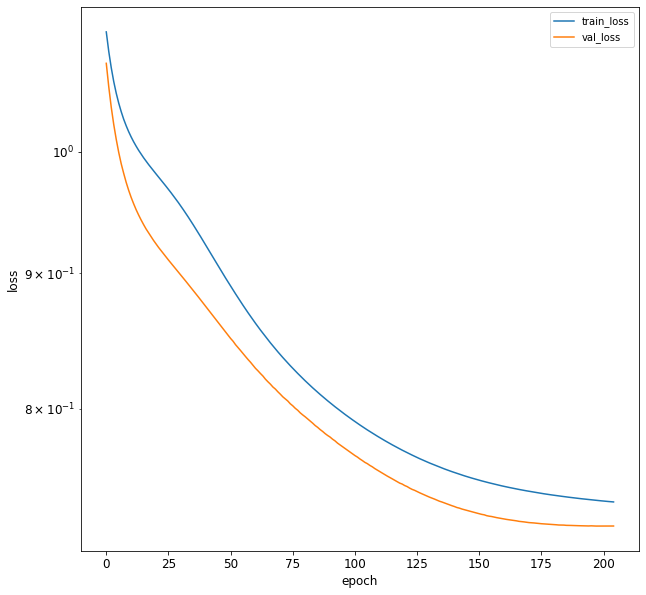

In [30]:
plot_df = pd.DataFrame.from_dict({'train_loss':history.history['loss'], 'val_loss':history.history['val_loss']})
plot_df.plot(logy=True, figsize=(10,10), fontsize=12)
plt.xlabel('epoch', fontsize=12)
plt.ylabel('loss', fontsize=12)
plt.show()



In [31]:
test = stlf_data.copy()[(stlf_data.index >= 7778) & (stlf_data.index<= 7989)][['Cons','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
test.head(20)

,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7778,1266.0,11.157452,90.256377,1.0,3.0,1.0,1346.0,1645.0,1769.0,1386.0,1498.0,1475.0,1482.083333
7779,1251.0,10.852452,92.354170,1.0,3.0,1.0,1337.0,1589.0,1689.0,1371.0,1480.0,1451.0,1445.583333
7780,1210.0,10.852452,92.354170,2.0,3.0,1.0,1331.0,1538.0,1682.0,1350.0,1436.0,1430.0,1406.250000
7781,1230.0,10.852452,92.354170,2.0,3.0,1.0,1282.0,1409.0,1671.0,1333.0,1445.0,1411.0,1369.500000
7782,1247.0,10.827452,92.414655,2.0,3.0,1.0,1266.0,1346.0,1645.0,1333.0,1445.0,1402.0,1336.333333
7783,1237.0,10.802452,92.475140,2.0,3.0,1.0,1251.0,1337.0,1589.0,1336.0,1423.0,1391.0,1307.000000
7784,1243.0,10.802452,92.475140,3.0,3.0,1.0,1210.0,1331.0,1538.0,1319.0,1422.0,1378.0,1282.416667
7785,1244.0,10.802452,92.475140,3.0,3.0,1.0,1230.0,1282.0,1409.0,1298.0,1409.0,1377.0,1268.666667
7786,1226.0,10.872452,92.077738,3.0,3.0,1.0,1247.0,1266.0,1346.0,1298.0,1395.0,1370.0,1258.666667
7787,1226.0,10.942452,91.680336,3.0,3.0,1.0,1237.0,1251.0,1337.0,1276.0,1389.0,1352.0,1249.416667


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = StandardScaler()
test[['Cons', 'Temp', 'Hum', 'A','B','C','D','E','F','G','H','I','J']] = scaler.fit_transform(test)
test.head(10)
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 7778 to 7989
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Cons    212 non-null    float64
 1   Temp    212 non-null    float64
 2   Hum     212 non-null    float64
 3   A       212 non-null    float64
 4   B       212 non-null    float64
 5   C       212 non-null    float64
 6   D       212 non-null    float64
 7   E       212 non-null    float64
 8   F       212 non-null    float64
 9   G       212 non-null    float64
 10  H       212 non-null    float64
 11  I       212 non-null    float64
 12  J       212 non-null    float64
dtypes: float64(13)
memory usage: 23.2 KB


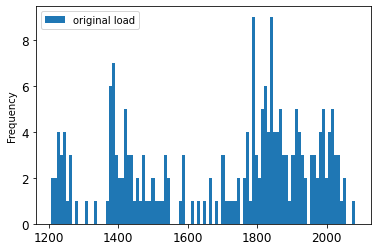

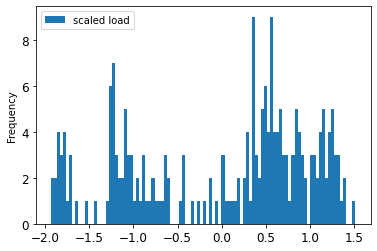

In [33]:
stlf_data[(stlf_data.index >= 7778) & (stlf_data.index <=7989)][['Cons']].rename(columns={'Cons':'original load'}).plot.hist(bins=100, fontsize=12)
test[(test.index >=7778) & (test.index <= 7989)][['Cons']].rename(columns={'Cons':'scaled load'}).plot.hist(bins=100, fontsize=12)
plt.show()

In [34]:
test_shifted = test.copy()
test_shifted=test_shifted.astype(np.float64)
test_shifted['y_t+100'] = test_shifted['Cons'].shift(-100)
test_shifted.head(10)


,Cons,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7778,-1.695814,-0.689298,0.964391,-1.498364,-1.004934,0.0,-1.365295,-0.214680,0.253435,-1.046706,-0.414813,-0.733959,-0.887962,-1.004984
7779,-1.754692,-0.779463,1.098770,-1.498364,-1.004934,0.0,-1.400353,-0.434991,-0.065865,-1.105681,-0.500123,-0.840385,-1.037618,-1.075637
7780,-1.915624,-0.779463,1.098770,-1.357685,-1.004934,0.0,-1.423724,-0.635632,-0.093804,-1.188246,-0.708659,-0.933507,-1.198891,-1.087412
7781,-1.837121,-0.779463,1.098770,-1.357685,-1.004934,0.0,-1.614594,-1.143136,-0.137708,-1.255083,-0.666004,-1.017761,-1.349572,-1.181617
7782,-1.770393,-0.786853,1.102645,-1.357685,-1.004934,0.0,-1.676919,-1.390987,-0.241481,-1.255083,-0.666004,-1.057671,-1.485561,-1.220868
7783,-1.809645,-0.794244,1.106519,-1.357685,-1.004934,0.0,-1.735349,-1.426394,-0.464991,-1.243289,-0.770271,-1.106450,-1.605832,-1.240494
7784,-1.786094,-0.794244,1.106519,-1.217006,-1.004934,0.0,-1.895056,-1.449999,-0.668545,-1.310126,-0.775011,-1.164097,-1.706628,-1.260120
7785,-1.782168,-0.794244,1.106519,-1.217006,-1.004934,0.0,-1.817150,-1.642772,-1.183417,-1.392691,-0.836624,-1.168532,-1.763005,-1.256195
7786,-1.852821,-0.773550,1.081063,-1.217006,-1.004934,0.0,-1.750930,-1.705718,-1.434867,-1.392691,-0.902976,-1.199572,-1.804007,-1.256195
7787,-1.852821,-0.752857,1.055606,-1.217006,-1.004934,0.0,-1.789883,-1.764730,-1.470788,-1.479187,-0.931412,-1.279392,-1.841933,-1.236569


In [35]:
test_shifted = test_shifted.rename(columns={'Cons':'Cons_original'})
test_shifted.head(10)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7778,-1.695814,-0.689298,0.964391,-1.498364,-1.004934,0.0,-1.365295,-0.214680,0.253435,-1.046706,-0.414813,-0.733959,-0.887962,-1.004984
7779,-1.754692,-0.779463,1.098770,-1.498364,-1.004934,0.0,-1.400353,-0.434991,-0.065865,-1.105681,-0.500123,-0.840385,-1.037618,-1.075637
7780,-1.915624,-0.779463,1.098770,-1.357685,-1.004934,0.0,-1.423724,-0.635632,-0.093804,-1.188246,-0.708659,-0.933507,-1.198891,-1.087412
7781,-1.837121,-0.779463,1.098770,-1.357685,-1.004934,0.0,-1.614594,-1.143136,-0.137708,-1.255083,-0.666004,-1.017761,-1.349572,-1.181617
7782,-1.770393,-0.786853,1.102645,-1.357685,-1.004934,0.0,-1.676919,-1.390987,-0.241481,-1.255083,-0.666004,-1.057671,-1.485561,-1.220868
7783,-1.809645,-0.794244,1.106519,-1.357685,-1.004934,0.0,-1.735349,-1.426394,-0.464991,-1.243289,-0.770271,-1.106450,-1.605832,-1.240494
7784,-1.786094,-0.794244,1.106519,-1.217006,-1.004934,0.0,-1.895056,-1.449999,-0.668545,-1.310126,-0.775011,-1.164097,-1.706628,-1.260120
7785,-1.782168,-0.794244,1.106519,-1.217006,-1.004934,0.0,-1.817150,-1.642772,-1.183417,-1.392691,-0.836624,-1.168532,-1.763005,-1.256195
7786,-1.852821,-0.773550,1.081063,-1.217006,-1.004934,0.0,-1.750930,-1.705718,-1.434867,-1.392691,-0.902976,-1.199572,-1.804007,-1.256195
7787,-1.852821,-0.752857,1.055606,-1.217006,-1.004934,0.0,-1.789883,-1.764730,-1.470788,-1.479187,-0.931412,-1.279392,-1.841933,-1.236569


In [36]:
test_shifted = test_shifted.dropna(how='any')
test_shifted.tail(5)

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J,y_t+100
7885,-1.256195,-1.160814,1.133625,-1.076327,0.516823,0.0,-1.166634,-0.973968,-0.828195,-1.754402,-1.452751,-1.181835,-1.132947,-1.209093
7886,-1.256195,-1.184463,1.123223,-1.076327,0.516823,0.0,-1.205587,-1.013310,-0.844160,-1.671837,-1.817688,-1.186269,-1.172582,-1.417127
7887,-1.236569,-1.208113,1.112822,-1.076327,0.516823,0.0,-1.225064,-1.084124,-0.939951,-1.640384,-1.481188,-1.199572,-1.202308,-1.138440
7888,-1.236569,-1.208113,1.112822,-0.935648,0.516823,0.0,-1.244540,-1.095927,-1.043723,-1.695427,-1.419575,-1.226179,-1.223151,-1.083487
7889,-1.173766,-1.208113,1.112822,-0.935648,0.516823,0.0,-1.240645,-1.190346,-1.011793,-1.644316,-1.400617,-1.159663,-1.241260,-0.953956


In [37]:
y_test = test_shifted[['y_t+100']]
y_test

,y_t+100
7778,-1.004984
7779,-1.075637
7780,-1.087412
7781,-1.181617
7782,-1.220868
...,...
7885,-1.209093
7886,-1.417127
7887,-1.138440
7888,-1.083487


In [38]:
X_test = test_shifted[['Cons_original','Temp','Hum','A','B','C','D','E','F','G','H','I','J']]
X_test

,Cons_original,Temp,Hum,A,B,C,D,E,F,G,H,I,J
7778,-1.695814,-0.689298,0.964391,-1.498364,-1.004934,0.0,-1.365295,-0.214680,0.253435,-1.046706,-0.414813,-0.733959,-0.887962
7779,-1.754692,-0.779463,1.098770,-1.498364,-1.004934,0.0,-1.400353,-0.434991,-0.065865,-1.105681,-0.500123,-0.840385,-1.037618
7780,-1.915624,-0.779463,1.098770,-1.357685,-1.004934,0.0,-1.423724,-0.635632,-0.093804,-1.188246,-0.708659,-0.933507,-1.198891
7781,-1.837121,-0.779463,1.098770,-1.357685,-1.004934,0.0,-1.614594,-1.143136,-0.137708,-1.255083,-0.666004,-1.017761,-1.349572
7782,-1.770393,-0.786853,1.102645,-1.357685,-1.004934,0.0,-1.676919,-1.390987,-0.241481,-1.255083,-0.666004,-1.057671,-1.485561
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7885,-1.256195,-1.160814,1.133625,-1.076327,0.516823,0.0,-1.166634,-0.973968,-0.828195,-1.754402,-1.452751,-1.181835,-1.132947
7886,-1.256195,-1.184463,1.123223,-1.076327,0.516823,0.0,-1.205587,-1.013310,-0.844160,-1.671837,-1.817688,-1.186269,-1.172582
7887,-1.236569,-1.208113,1.112822,-1.076327,0.516823,0.0,-1.225064,-1.084124,-0.939951,-1.640384,-1.481188,-1.199572,-1.202308
7888,-1.236569,-1.208113,1.112822,-0.935648,0.516823,0.0,-1.244540,-1.095927,-1.043723,-1.695427,-1.419575,-1.226179,-1.223151


In [39]:
predictions = model.predict(X_test)
predictions

array([[0.00274643],
       [0.00255638],
       [0.00176498],
       [0.0016464 ],
       [0.0016847 ],
       [0.00162125],
       [0.00151283],
       [0.00170651],
       [0.00172964],
       [0.0016194 ],
       [0.00144839],
       [0.0015218 ],
       [0.00142583],
       [0.00166133],
       [0.00160456],
       [0.00165978],
       [0.00170407],
       [0.0020515 ],
       [0.00195205],
       [0.00243601],
       [0.00407174],
       [0.00543094],
       [0.01554587],
       [0.05352366],
       [0.0944491 ],
       [0.1793218 ],
       [0.29565516],
       [0.45185536],
       [0.56709665],
       [0.67434794],
       [0.69787467],
       [0.78261423],
       [0.85804987],
       [0.89720297],
       [0.90348077],
       [0.8458166 ],
       [0.8085054 ],
       [0.8206998 ],
       [0.7443338 ],
       [0.7329692 ],
       [0.74597317],
       [0.7584644 ],
       [0.7286134 ],
       [0.71345127],
       [0.691887  ],
       [0.62615687],
       [0.6483483 ],
       [0.678

In [40]:
feature=stlf_data.copy()[(stlf_data.index >= 7778) & (stlf_data.index <=7989)][['Cons']]
#test_mean=cons.mean()
#test_mean
load_mean=feature.mean()
print(load_mean)
load_std=feature.std()
print(load_std)

Cons    1698.035377
dtype: float64
Cons    255.368705
dtype: float64


In [41]:
load_mean=1698.035377
load_std=255.368705
rescaled_target_load=(y_test*load_std)+load_mean
print(rescaled_target_load.shape)


(112, 1)


In [42]:
rescaled_predicted_load=(predictions*load_std)+load_mean
print(rescaled_predicted_load.shape)

(112, 1)


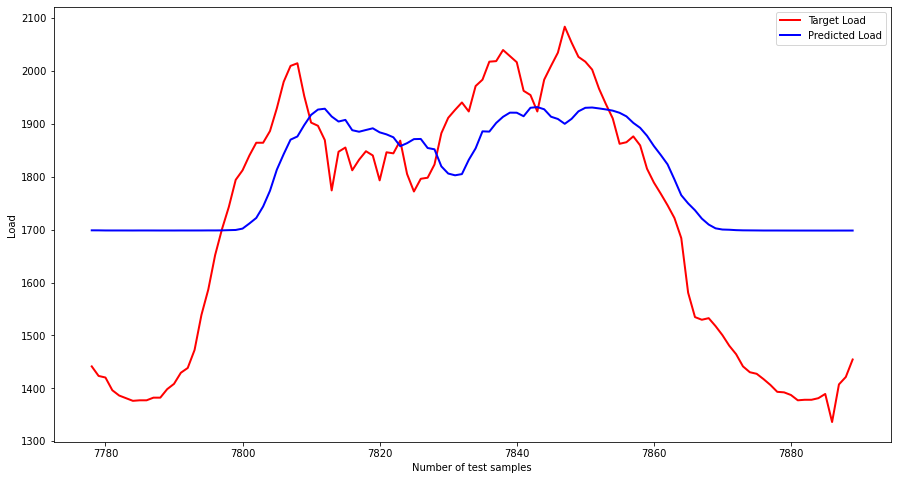

In [43]:
timestamp = y_test.index
plt.figure(figsize = (15,8))
plt.plot(timestamp,rescaled_target_load,label="Target Load",color='red', linestyle='solid',linewidth=2)

plt.plot(timestamp,rescaled_predicted_load,label="Predicted Load",color='blue', linestyle='solid',linewidth=2)

plt.xlabel('Number of test samples') 
plt.ylabel('Load') 
plt.legend()
plt.show()

In [44]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true),np.array(y_pred)

    ## Note: does not handle mix 1d representation
    #if _is_1d(y_true): 
    #    y_true, y_pred = _check_1d_array(y_true, y_pred)

    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE=mean_absolute_percentage_error(rescaled_target_load, rescaled_predicted_load)
print(MAPE)

9.813385879313252


In [45]:
MPE=np.mean((rescaled_target_load - rescaled_predicted_load) / rescaled_target_load) * 100
print(MPE)

y_t+100   -6.48556
dtype: float64


In [46]:
PE=((rescaled_target_load - rescaled_predicted_load / rescaled_target_load)) * 100
APE=np.abs(PE)
print(APE)

            y_t+100
7778  144021.546011
7779  142215.795122
7780  141914.846622
7781  139507.108000
7782  138503.860878
...             ...
7885  138804.848034
7886  133487.444323
7887  140610.674842
7888  142015.180258
7889  145325.707392

[112 rows x 1 columns]


In [47]:
error = np.subtract(rescaled_target_load,rescaled_predicted_load)
sqerr=np.square(error)
print(sqerr)
MSE=sqerr.mean()
print(MSE)

            y_t+100
7778   66225.263622
7779   75810.374676
7780   77362.855758
7781   91305.694916
7782   97469.936744
...             ...
7885   95499.153168
7886  131145.059411
7887   84679.835708
7888   76706.898424
7889   59485.573126

[112 rows x 1 columns]
y_t+100    33842.26711
dtype: float64


In [48]:
RMSE=MSE**0.5
print(RMSE)

y_t+100    183.962679
dtype: float64


In [49]:
a=np.array(rescaled_predicted_load)

In [50]:
for i in  range(0,102):
    b=a[i]
    print(b)

[1698.7367]
[1698.6882]
[1698.4861]
[1698.4558]
[1698.4656]
[1698.4495]
[1698.4218]
[1698.4712]
[1698.477]
[1698.449]
[1698.4053]
[1698.4241]
[1698.3995]
[1698.4596]
[1698.4452]
[1698.4592]
[1698.4706]
[1698.5593]
[1698.5339]
[1698.6575]
[1699.0752]
[1699.4222]
[1702.0054]
[1711.7036]
[1722.1548]
[1743.8286]
[1773.5365]
[1813.4252]
[1842.8541]
[1870.2428]
[1876.2507]
[1897.8906]
[1917.1545]
[1927.153]
[1928.7561]
[1914.0305]
[1904.5024]
[1907.6165]
[1888.115]
[1885.2128]
[1888.5336]
[1891.7235]
[1884.1005]
[1880.2285]
[1874.7217]
[1857.9363]
[1863.6033]
[1871.245]
[1871.573]
[1854.4613]
[1851.976]
[1819.7296]
[1806.1497]
[1802.8209]
[1805.1064]
[1832.0818]
[1853.825]
[1885.9706]
[1885.4667]
[1901.8391]
[1913.4683]
[1921.3217]
[1921.2032]
[1914.5387]
[1930.5465]
[1931.8501]
[1927.6814]
[1913.6343]
[1909.3448]
[1900.1909]
[1909.604]
[1923.7982]
[1930.481]
[1931.0437]
[1929.3207]
[1927.4171]
[1925.1105]
[1921.036]
[1914.2792]
[1901.9745]
[1892.6073]
[1877.6099]
[1858.2705]
[1841.3822]
[18